In [2]:
import json 
import os 
import re 
from matplotlib import pyplot as plt 

from pathlib import Path
import tensorflow as tf
import numpy as np 



In [3]:

def load_train_dataset(dataset_name: str):
    if dataset_name.lower() == 'mnist':
        (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
    elif dataset_name.lower() == 'fashion':
        (train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
    elif dataset_name.lower() == 'cifar':
        (train_images, train_labels), _ = tf.keras.datasets.cifar10.load_data()
    else:
        raise ValueError("Dataset must be one of 'mnist', 'fashion', or 'cifar'")
    
    
    return train_images, train_labels

_, mnist_labels = load_train_dataset('mnist')
_, fashion_labels = load_train_dataset('fashion')
_, cifar_labels = load_train_dataset('cifar')


In [4]:
def plot_labels_histogram(
    data, 
    title: str, 
    suptitle: str = None, 
    x_tick_labels: list = [str(_) for _ in range(10)], 
    show_bar_counts: bool = True,
    show: bool = True, 
    save: bool = False
): 
    
    plot_config_path = "./../code/src/plott_configs/config.json"
    plot_config = None 
    with open(plot_config_path) as f: 
        plot_config = json.load(f)
        
    plt.rcParams.update(
        {
            "font.family": plot_config.get("font_family", "serif"),
            "font.size": plot_config.get("font_size", 12),
        }
    )

    counts, bin_edges, bars = plt.hist(data, bins=np.arange(11) - 0.5, edgecolor=plot_config.get("histogram_edge_color", "black"))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.xticks(bin_centers, labels=x_tick_labels)
    plt.title(title, fontsize=10)
    plt.suptitle(suptitle, )

    if show_bar_counts: 
        plt.bar_label(bars, fontsize=10, label_type='edge')
    
    if show: 
        plt.show() 

    

## real data 

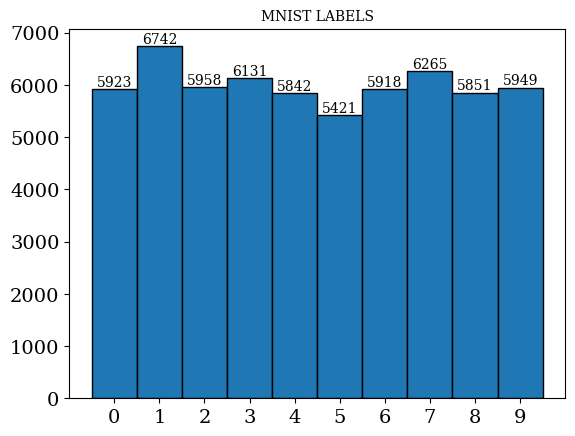

60000


In [5]:
plot_labels_histogram(mnist_labels, "MNIST LABELS", show=True)
print(len(mnist_labels))

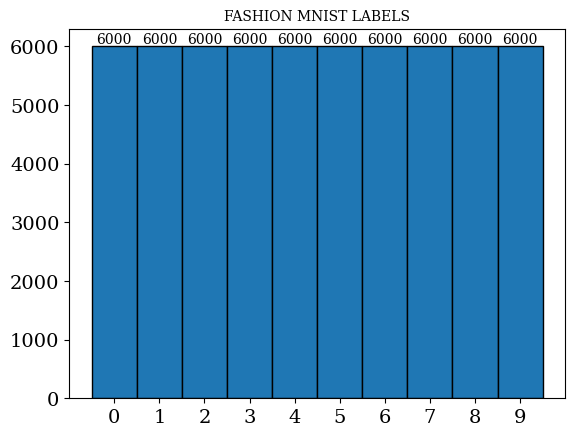

60000


In [6]:
plot_labels_histogram(fashion_labels, "FASHION MNIST LABELS", show=True)
print(len(fashion_labels))

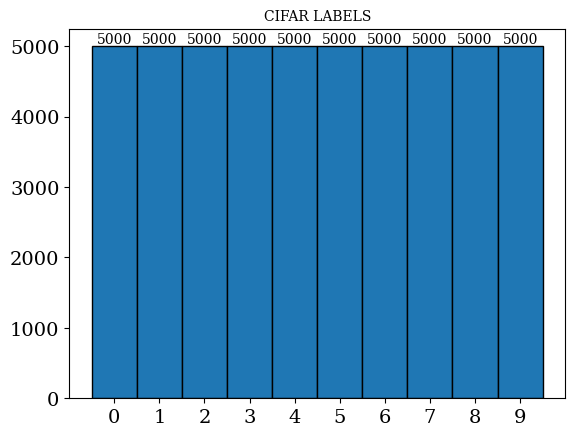

50000


In [7]:
plot_labels_histogram(cifar_labels, "CIFAR LABELS", show=True)
print(len(cifar_labels))

## generated data

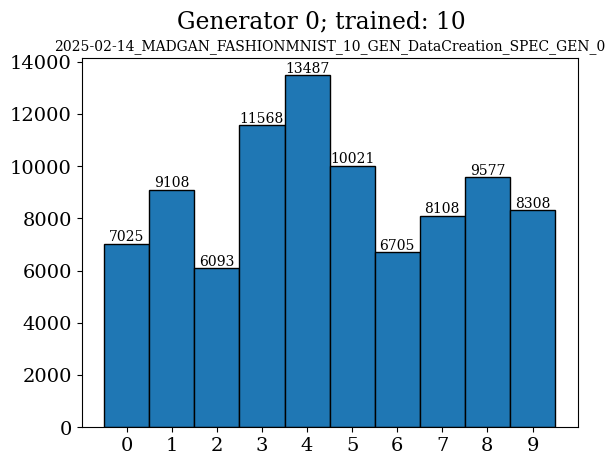

90000


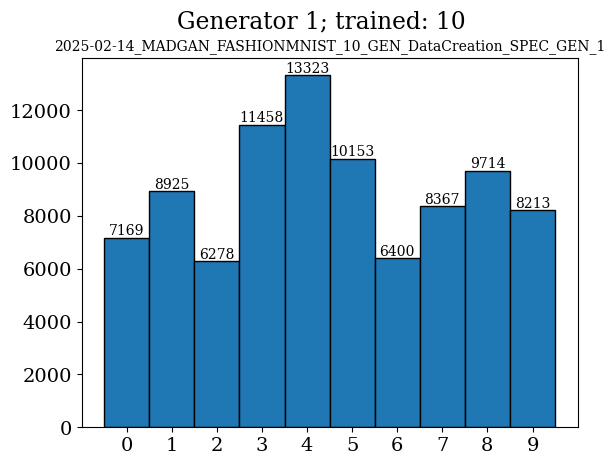

90000


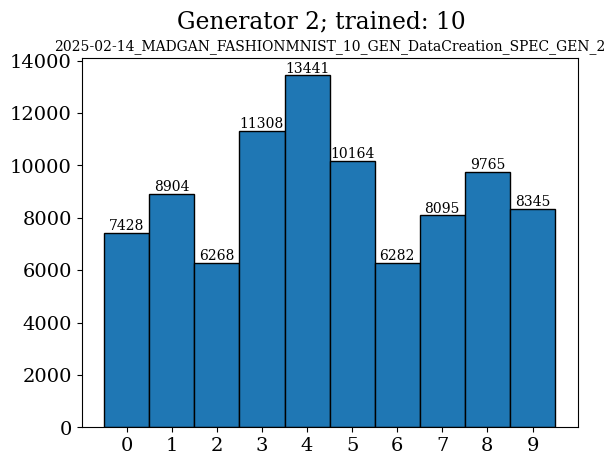

90000


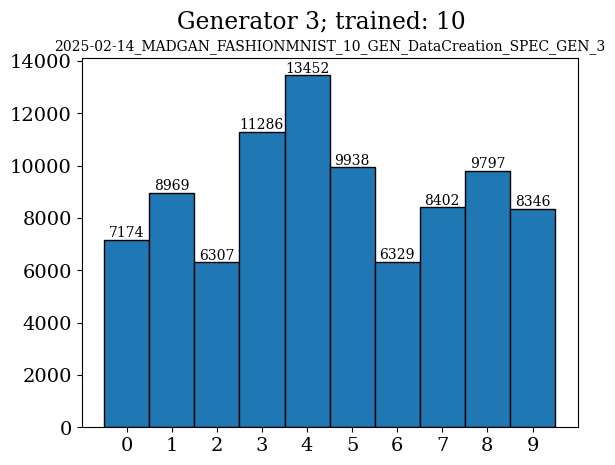

90000


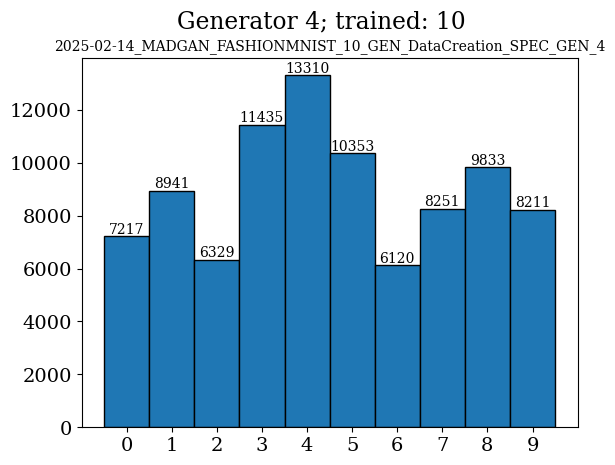

90000


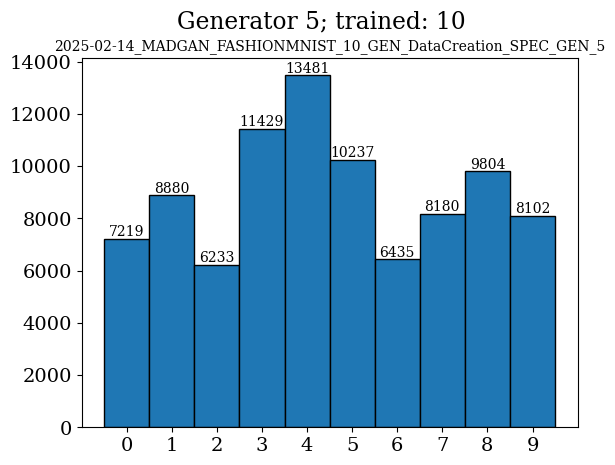

90000


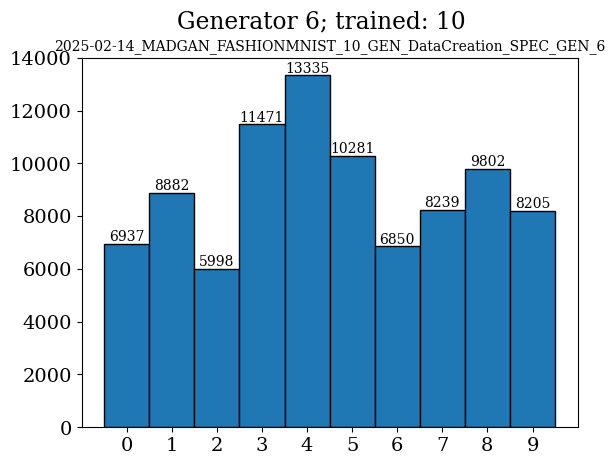

90000


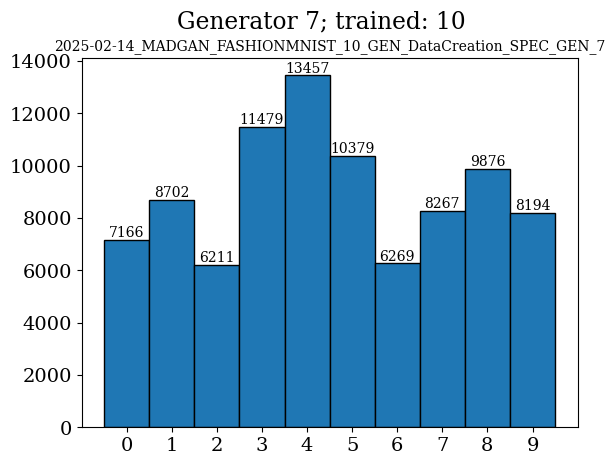

90000


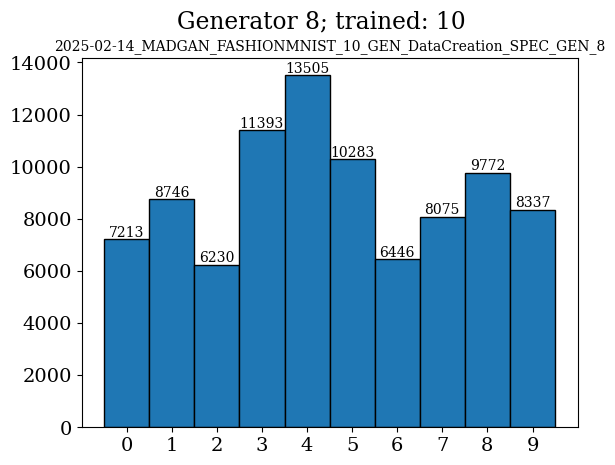

90000


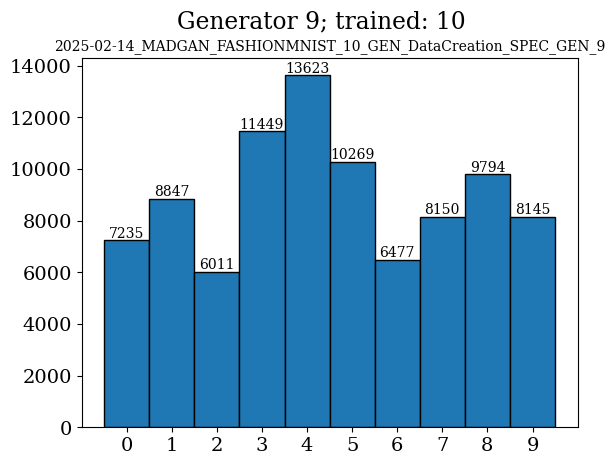

90000


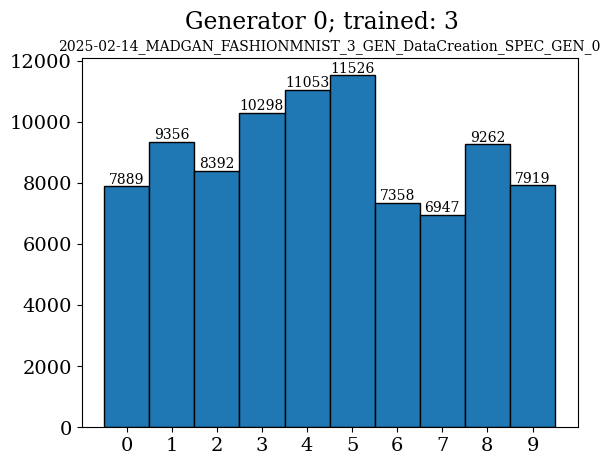

90000


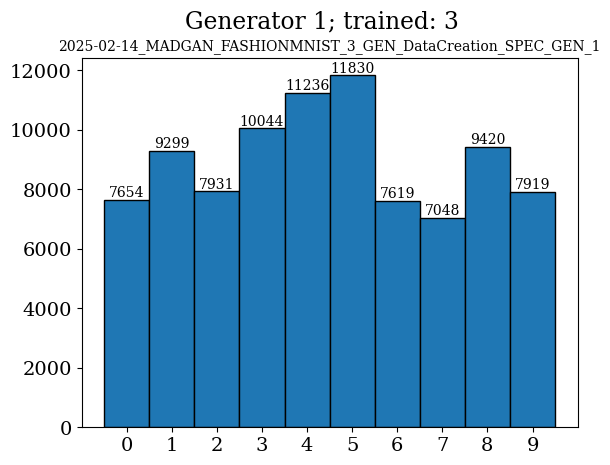

90000


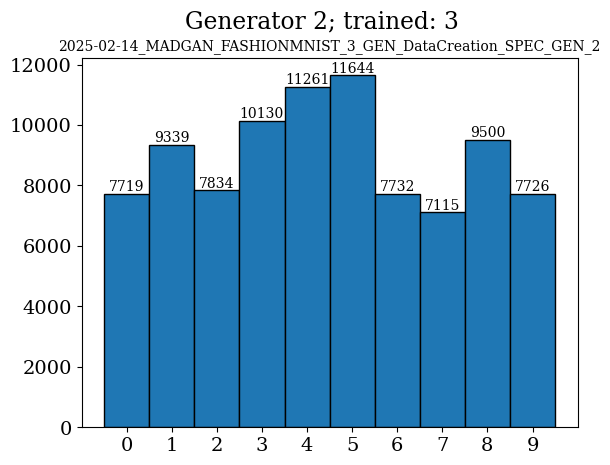

90000


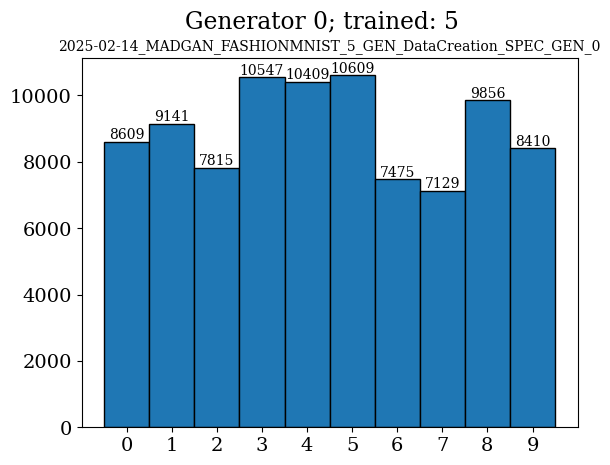

90000


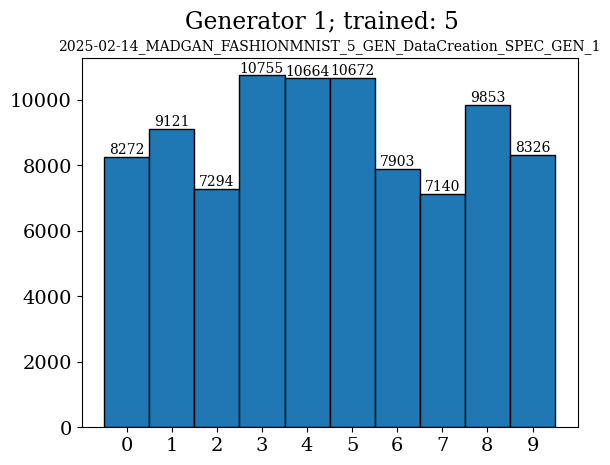

90000


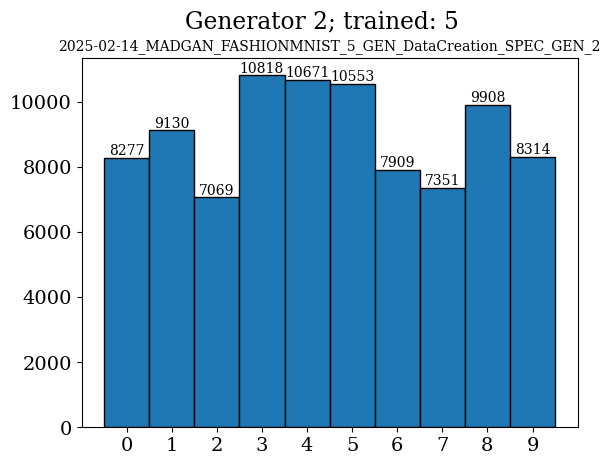

90000


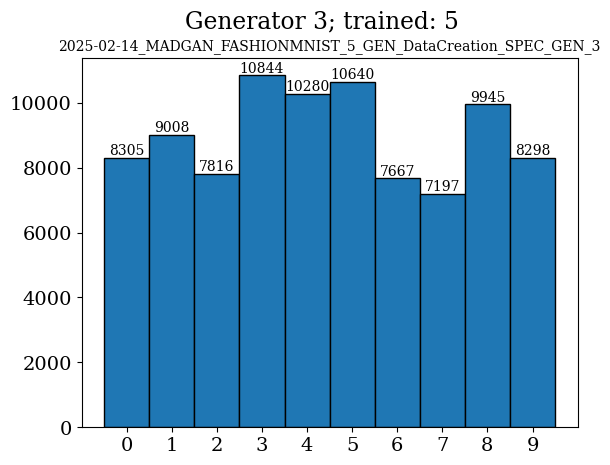

90000


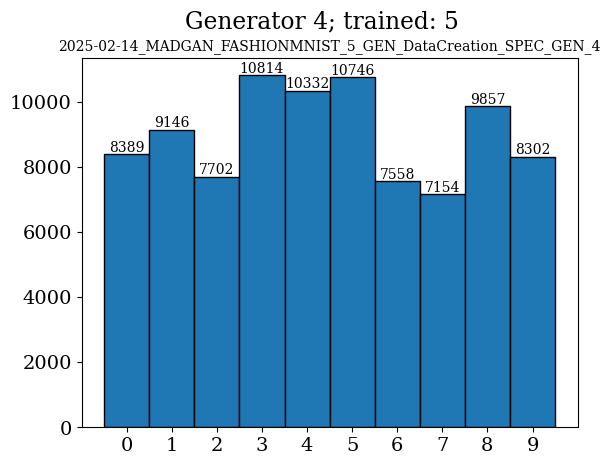

90000


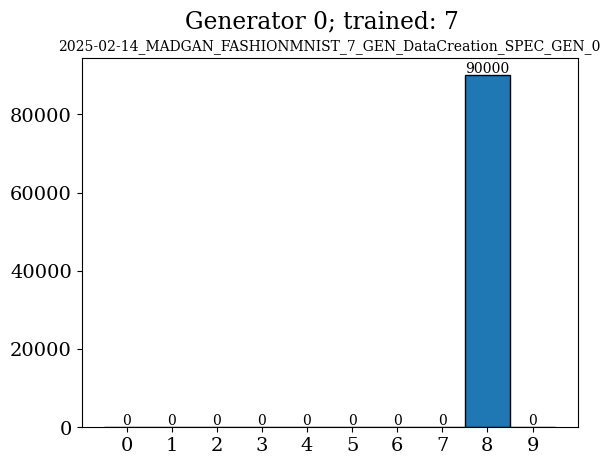

90000


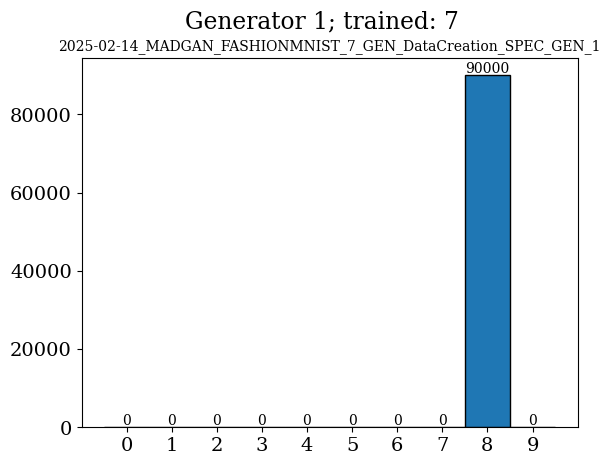

90000


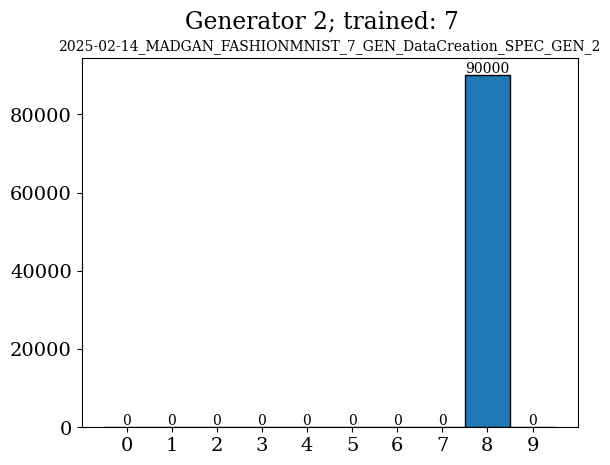

90000


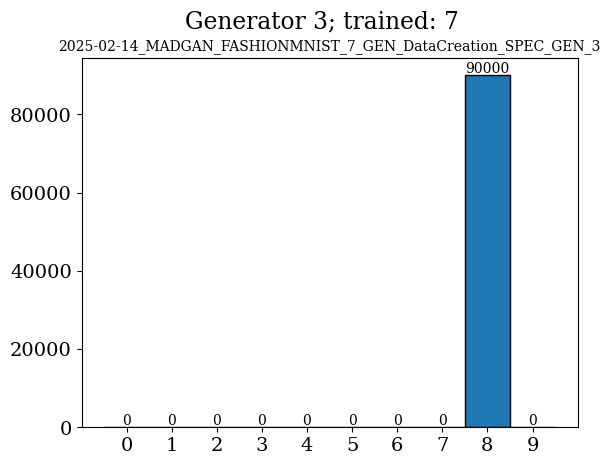

90000


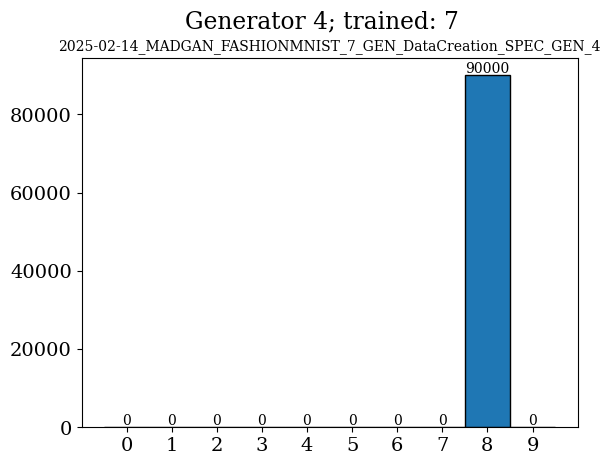

90000


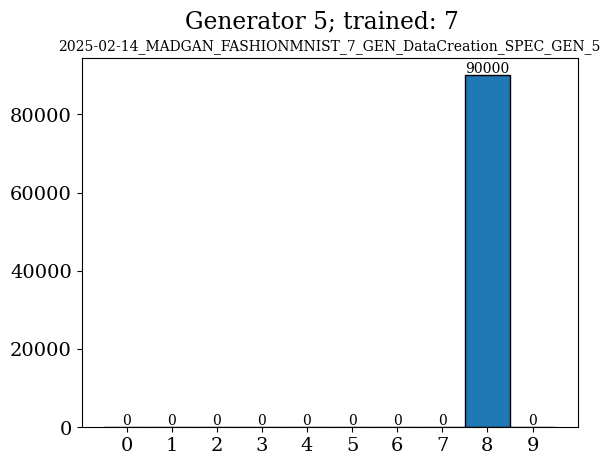

90000


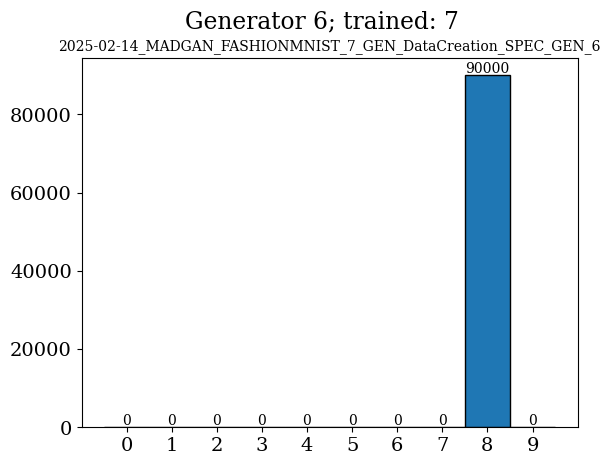

90000


In [14]:

experiments_path = './../../mad_gan_thesis/code/experiments/'

experiments_path = './experiments/'

dataset_identifier = "_FASHIONMNIST_"
classification_experiment_name = "ClassificationExperiment_MNIST_MADGAN"

all_experiments = os.listdir(experiments_path)
creation_experiments = [exp for exp in all_experiments if (f'{dataset_identifier}' in exp) and ('DataCreation_SPEC' in exp)]

experiments_to_run = []

for ex in creation_experiments: 
    # Extract number of trained generators
    match1 = re.search(r'(\d+)_GEN', ex)
    generators_trained = int(match1.group(1)) if match1 else None

    # Extract the generator used
    match2 = re.search(r'_GEN_(\d+)', ex)
    generator_used = int(match2.group(1)) if match2 else None

    with open(Path(experiments_path) / ex / "labels.json") as f: 
        labels = json.load(f)

    with open(Path(experiments_path) / ex / "certainties.json") as f: 
        certainties = json.load(f)

    plot_labels_histogram(labels.values(), suptitle=f"Generator {generator_used}; trained: {generators_trained}", title=ex)
    print(len(labels.values()))
    

In [11]:
creation_experiments

['2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_0',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_1',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_2',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_3',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_4',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_5',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_6',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_7',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_8',
 '2025-02-14_MADGAN_FASHIONMNIST_10_GEN_DataCreation_SPEC_GEN_9']

In [ ]:
"C:\\Users\\NiXoN\\Desktop\\_thesis\\mad_gan_thesis\\code\\experiments\\2025-02-12_MADGAN_MNIST_5_GEN_DataCreation_SPEC_GEN_0"